## 1. Import library

In [ ]:
# Importing the required libraries

# To work with dataframes
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns
import matplotlib.pyplot as plt

# To scale variables
from sklearn.preprocessing import StandardScaler

# To identify pricipal components
from sklearn.decomposition import PCA 

# To perform K-Means Clustering
from sklearn import cluster

# To scale independent numerical variables
from sklearn.preprocessing import QuantileTransformer

# To perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# To perform DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

# To produce dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To calculate the f1 score for accuracy evaluation
from sklearn.metrics import f1_score

## 2. Understanding data

In [ ]:
df = pd.read_csv('wine.csv', header= 0)
df.head()

Class_Label  Alcohol  Malic_Acid  ...   Hue  OD280  Proline
0            1    14.23        1.71  ...  1.04   3.92     1065
1            1    13.20        1.78  ...  1.05   3.40     1050
2            1    13.16        2.36  ...  1.03   3.17     1185
3            1    14.37        1.95  ...  0.86   3.45     1480
4            1    13.24        2.59  ...  1.04   2.93      735

[5 rows x 14 columns]

In [ ]:
y_label = pd.DataFrame(df["Class_Label"])
y_label.head()

Class_Label
0            1
1            1
2            1
3            1
4            1

In [ ]:
df.head()

Class_Label  Alcohol  Malic_Acid  ...   Hue  OD280  Proline
0            1    14.23        1.71  ...  1.04   3.92     1065
1            1    13.20        1.78  ...  1.05   3.40     1050
2            1    13.16        2.36  ...  1.03   3.17     1185
3            1    14.37        1.95  ...  0.86   3.45     1480
4            1    13.24        2.59  ...  1.04   2.93      735

[5 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class_Label           178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.isnull().sum()

Class_Label             0
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.describe()

Class_Label     Alcohol  Malic_Acid  ...         Hue       OD280      Proline
count   178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean      1.938202   13.000618    2.336348  ...    0.957449    2.611685   746.893258
std       0.775035    0.811827    1.117146  ...    0.228572    0.709990   314.907474
min       1.000000   11.030000    0.740000  ...    0.480000    1.270000   278.000000
25%       1.000000   12.362500    1.602500  ...    0.782500    1.937500   500.500000
50%       2.000000   13.050000    1.865000  ...    0.965000    2.780000   673.500000
75%       3.000000   13.677500    3.082500  ...    1.120000    3.170000   985.000000
max       3.000000   14.830000    5.800000  ...    1.710000    4.000000  1680.000000

[8 rows x 14 columns]

In [ ]:
features = list(df.columns)
print(features)

['Class_Label', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


## 3. Exploratory data analysis & Data Visualization

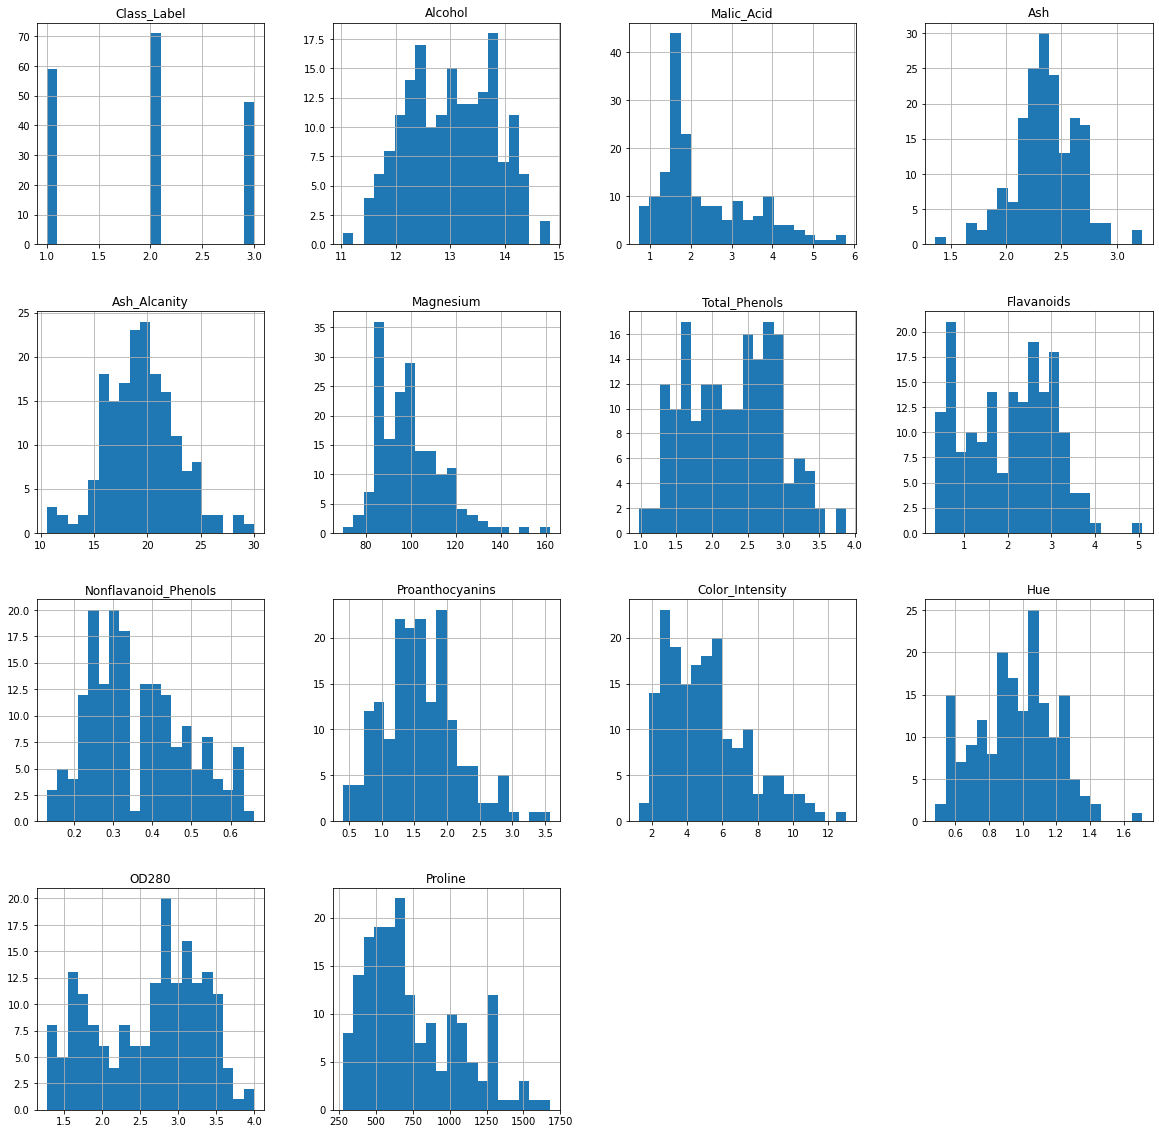

In [ ]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

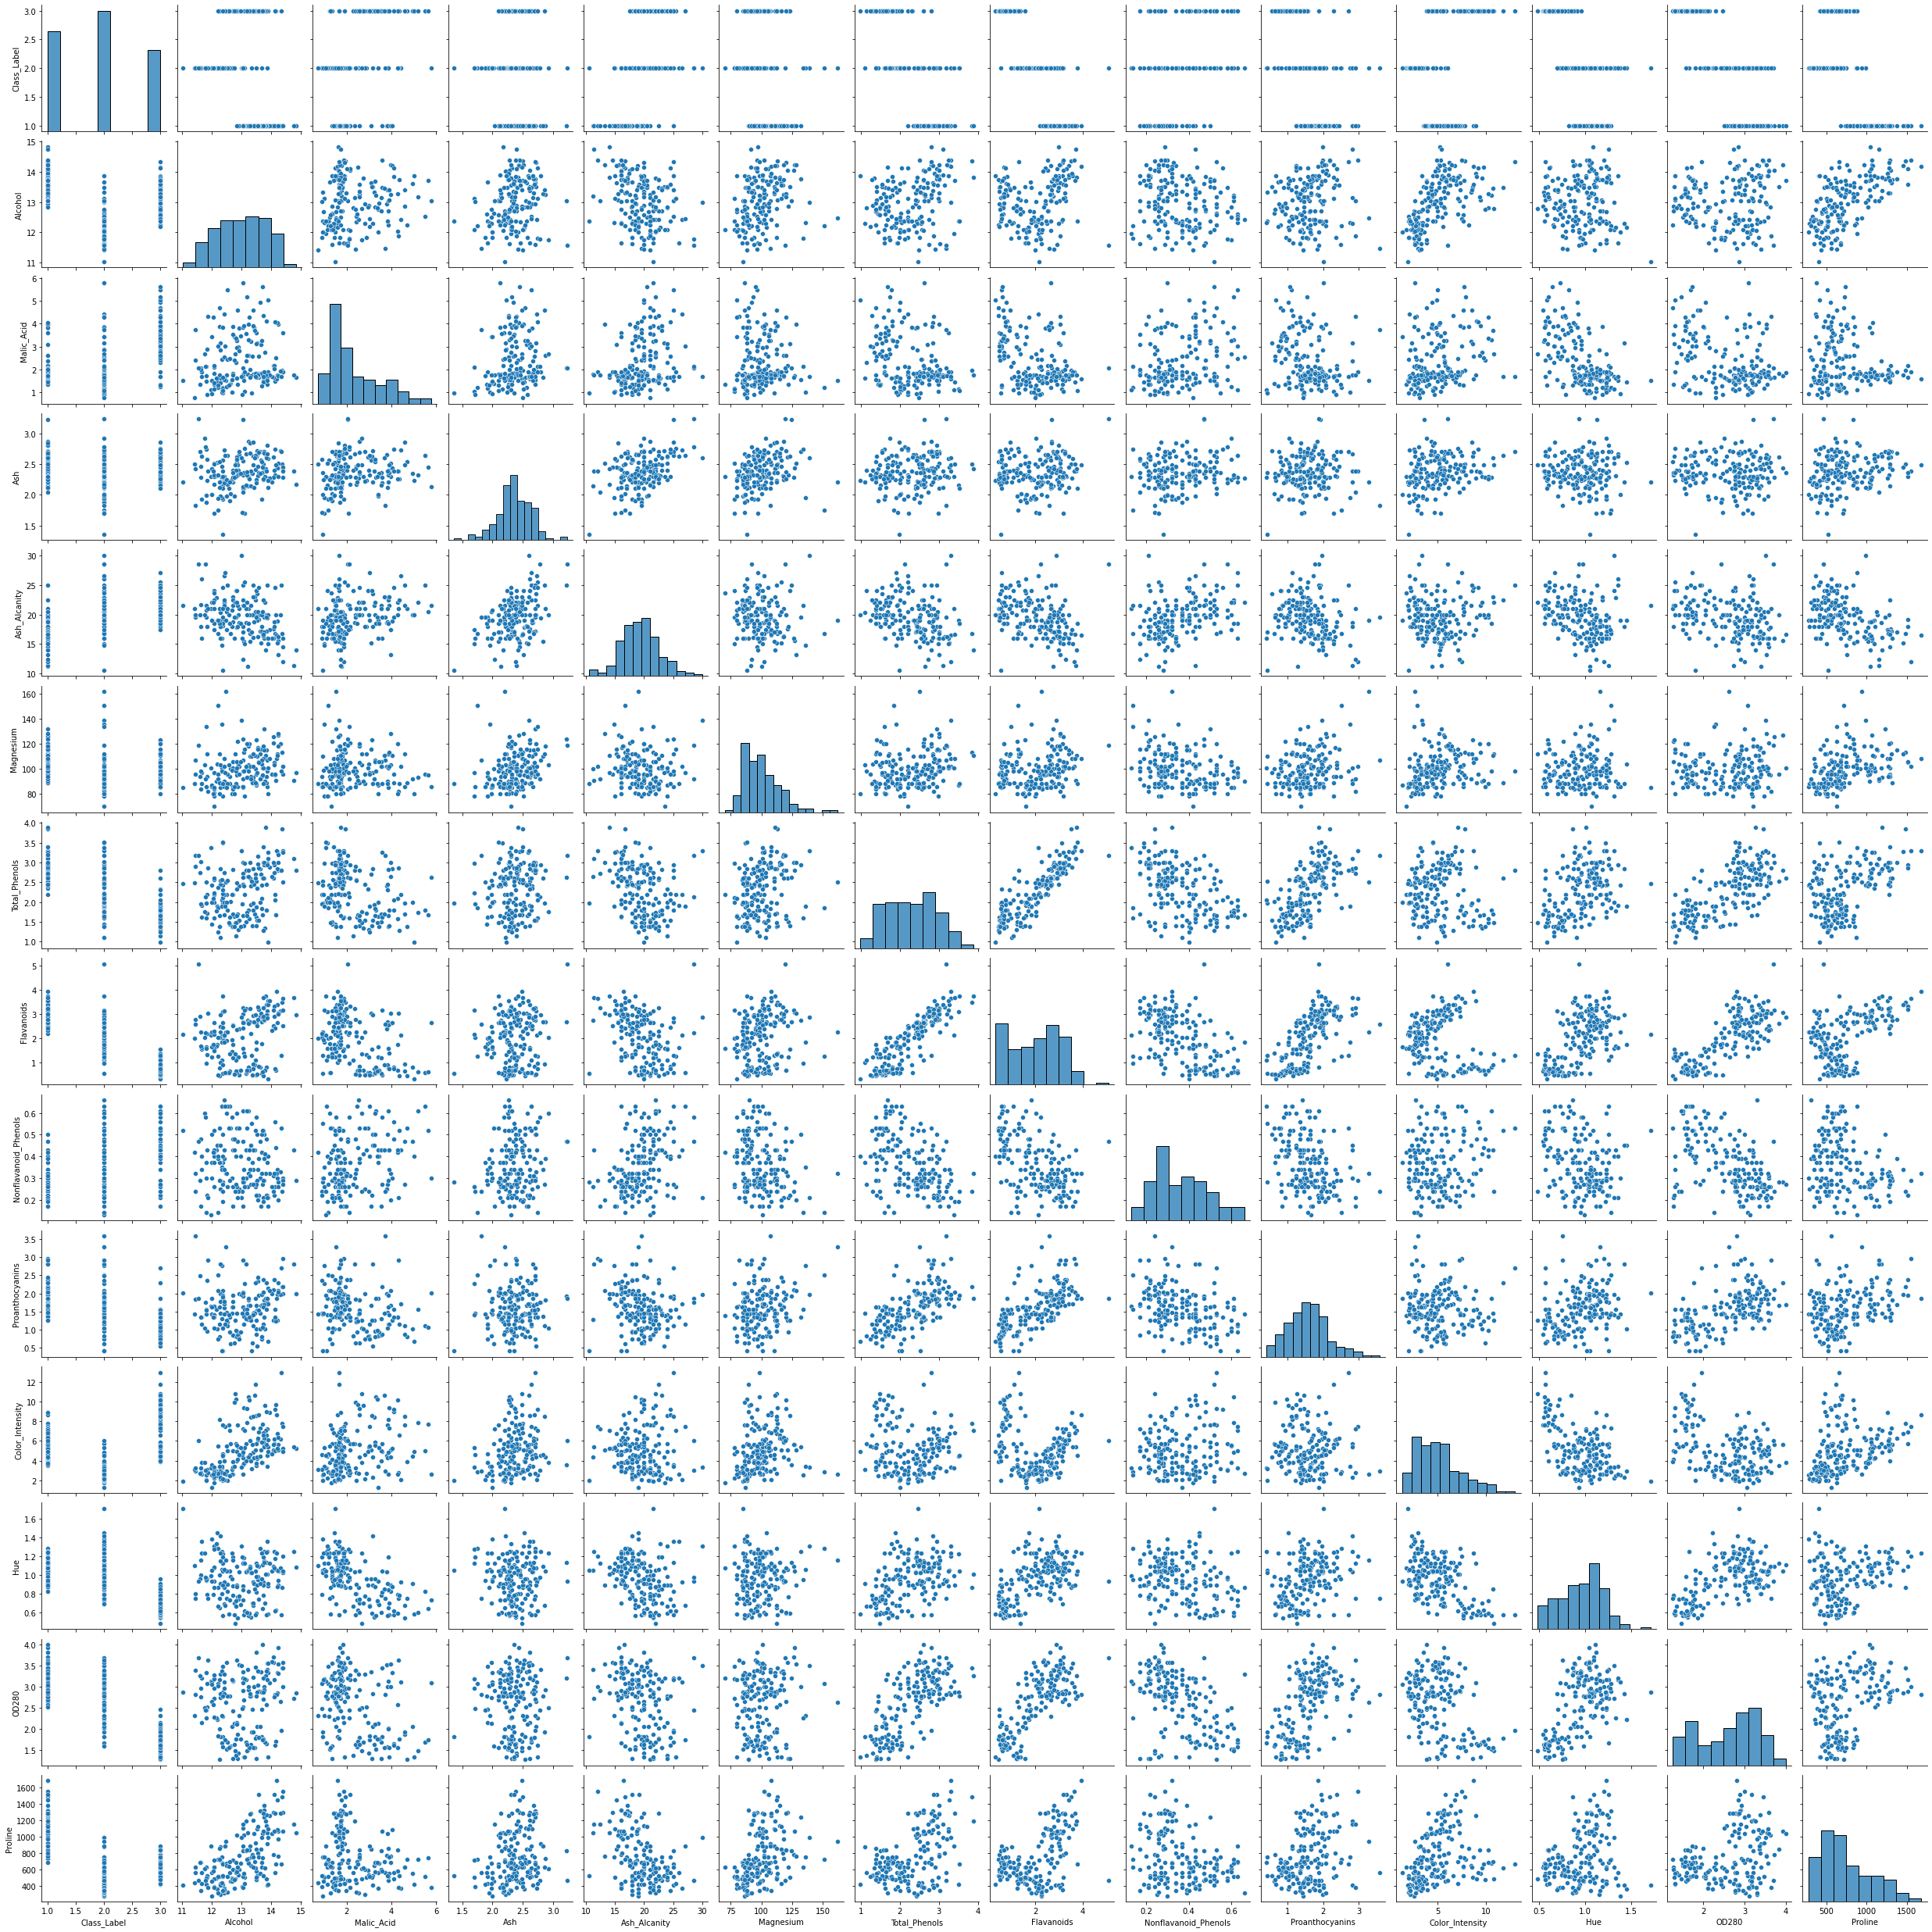

In [ ]:
sns.pairplot(df)
plt.show()

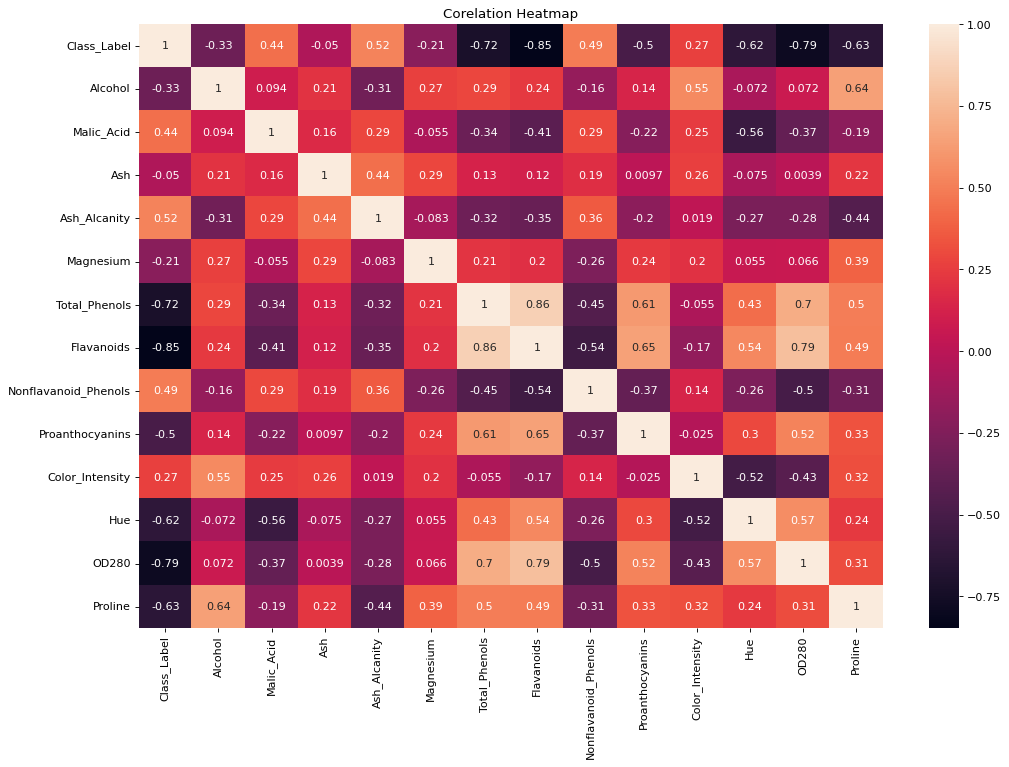

In [ ]:
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (15, 10)
sns.heatmap(df.corr(), annot = True)
plt.title("Corelation Heatmap")
plt.show()

In [ ]:
df = df.drop(["Class_Label"], axis = 1)

In [ ]:
df.shape

(178, 13)

In [ ]:
features = list(df.columns)
print(features)

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


## 4. Functions for clustering

In [ ]:
# Function to find optimim K Value
def findk(df):
    distortions = []  

    for i in range(1, 11):
        km = cluster.KMeans(n_clusters=i,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
        km.fit(df.values)
        distortions.append(km.inertia_)

    #Plotting the K-means Elbow plot
    plt.figure(figsize = (7,7)) 
    plt.plot(range(1,11), distortions, marker='o')
    plt.title('ELBOW PLOT')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [ ]:
# Function to Scale variables
def scale_function(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    return scaled_data

In [ ]:
# Function to perform K-Means Clustering
def kmeans_function(data,k):
    km = cluster.KMeans(n_clusters=k,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(data.values)
    label = km.labels_
    return label,data

In [ ]:
# Function Performs Hierarchical Clustering
def hierarchical_function(data,k):
    h_cluster = AgglomerativeClustering(n_clusters=k, 
                                    affinity='euclidean',
                                    linkage='ward').fit(data)

    labels = h_cluster.labels_
    return labels,data

In [ ]:
# Function Performs DBScan Clustering
def dbscan_function(data,eps,minPts):
    cluster = DBSCAN(eps=eps, min_samples=minPts).fit(data)
    labels = cluster.labels_
    
    #identifying the points which makes up our core points
    sample_cores=np.zeros_like(labels,dtype=bool)

    sample_cores[cluster.core_sample_indices_]=True

    #Calculating the number of clusters

    n_clusters=len(set(labels))- (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("No. of clusters: ",n_clusters)

    print("Score: ",metrics.silhouette_score(data,labels))
    
    return labels,data

# 5. KMeans clustering

In [ ]:
reduced_data = df.copy()

In [ ]:
reduced_data.drop(['Ash_Alcanity', 'Proanthocyanins', 'OD280'], axis = 1, inplace = True)

In [ ]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Magnesium             178 non-null    int64  
 4   Total_Phenols         178 non-null    float64
 5   Flavanoids            178 non-null    float64
 6   Nonflavanoid_Phenols  178 non-null    float64
 7   Color_Intensity       178 non-null    float64
 8   Hue                   178 non-null    float64
 9   Proline               178 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 14.0 KB


In [ ]:
features_reduced = reduced_data.columns

In [ ]:
scaled_reduced = scale_function(reduced_data)
model_data_reduced = pd.DataFrame(scaled_reduced,columns = features_reduced)

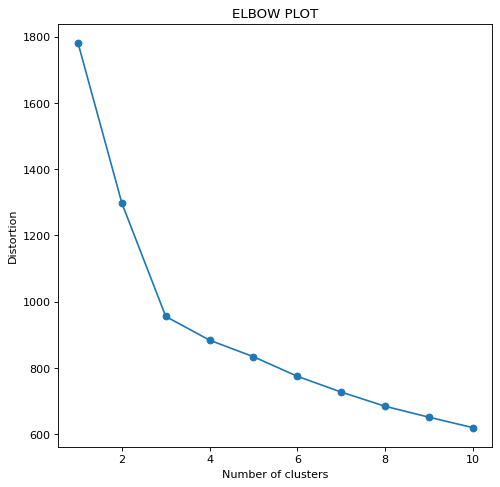

In [ ]:
findk(model_data_reduced)

In [ ]:
labels_km_reduced, km_data_reduced = kmeans_function(model_data_reduced,6)

In [ ]:
km_data_reduced['labels'] = labels_km_reduced

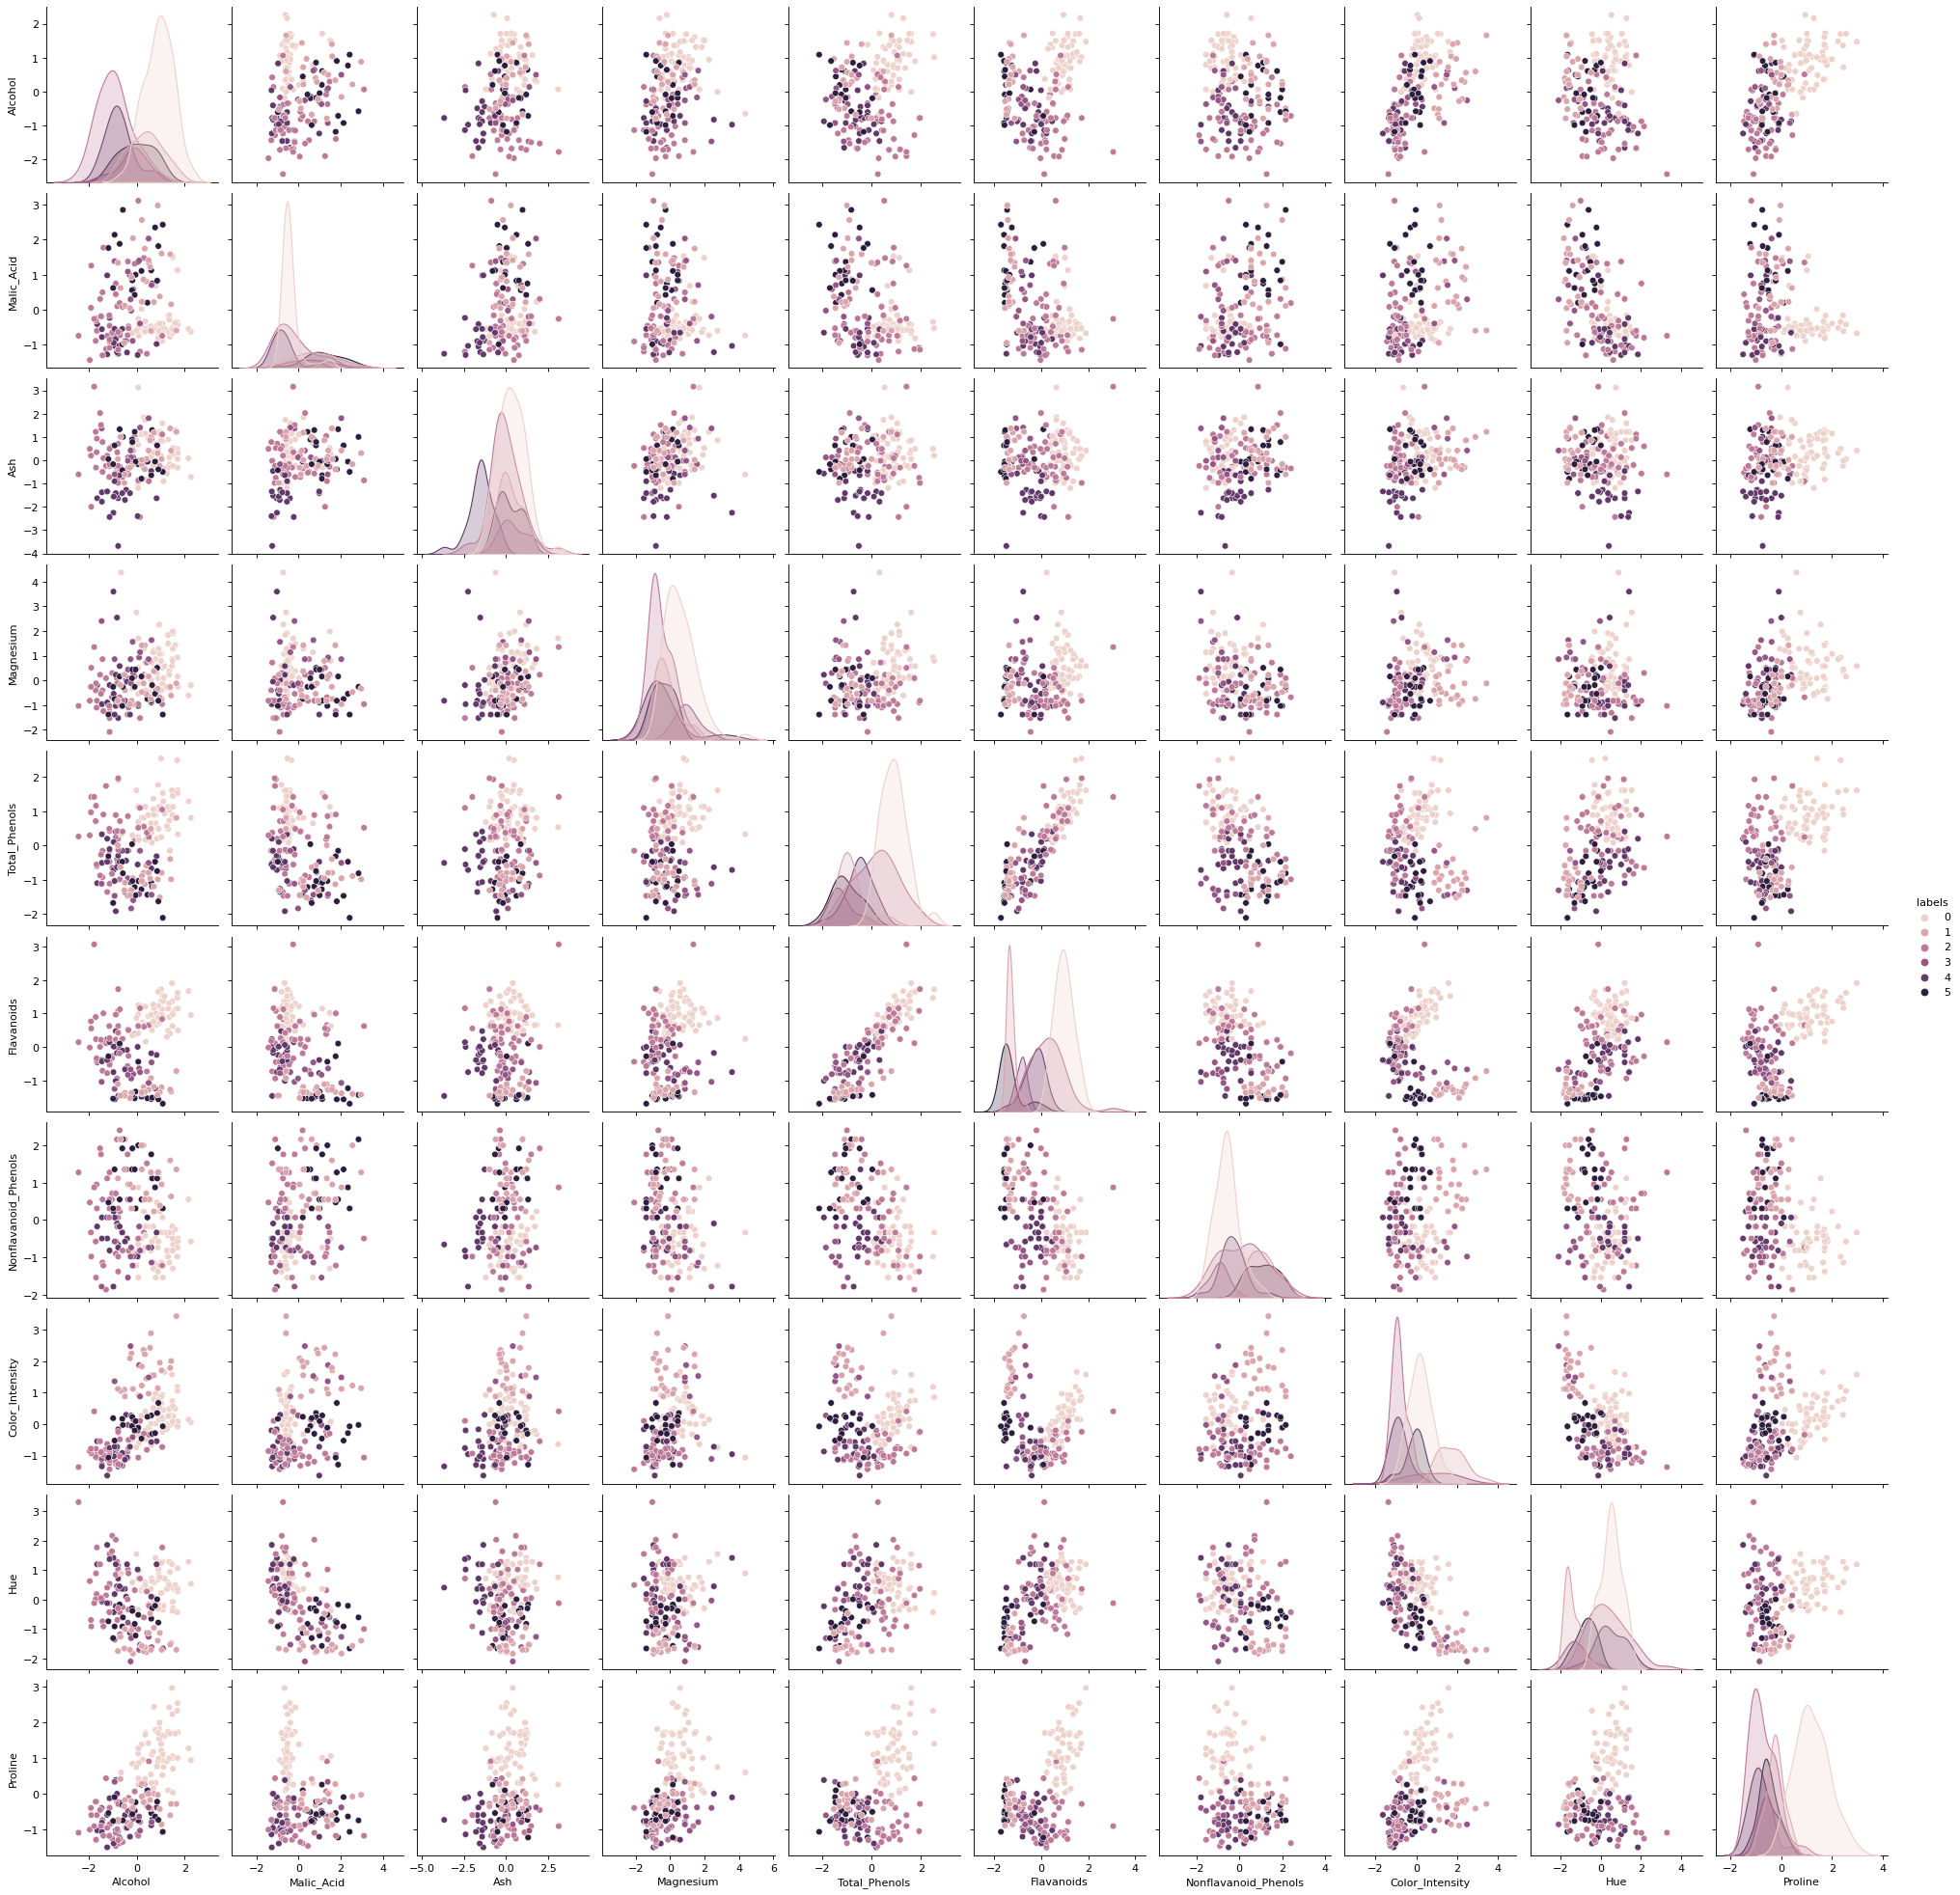

In [ ]:
sns.pairplot(km_data_reduced, x_vars = features_reduced, y_vars = features_reduced, hue='labels', diag_kind='kde')
plt.show()

In [ ]:
cluster_df1 = pd.concat([reduced_data[km_data_reduced['labels']==0].mean(), 
                  reduced_data[km_data_reduced['labels']==1].mean(), 
                  reduced_data[km_data_reduced['labels']==2].mean()],
                  axis=1)
cluster_df1.columns = ['cluster1','cluster2','cluster3']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
cluster_df1

cluster1  cluster2  cluster3
Alcohol                 13.605    13.154    12.270
Malic_Acid               1.930     3.500     1.858
Ash                      2.463     2.441     2.212
Ash_Alcanity            17.585    21.694    19.752
Magnesium              109.831    98.633    90.344
Flavanoids               2.916     0.858     2.025
Nonflavanoid_Phenols     0.286     0.449     0.372
Color_Intensity          5.325     7.244     3.114
Hue                      1.070     0.689     1.049

KMeans gives overlapping cluster

####Estimating minPts and epsilon radius

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(dbscan_data)
distances, indices = neighbors_fit.kneighbors(dbscan_data)

Text(0, 0.5, 'Epsilon')

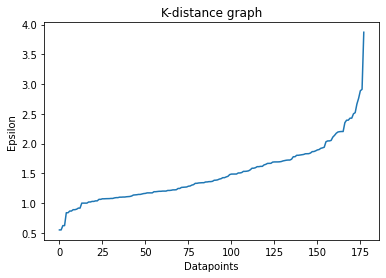

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Datapoints')
plt.ylabel('Epsilon')


#6. Hierarchical Clustering

In [ ]:
h_reduced_data = df.copy()

In [ ]:
h_reduced_data.drop(['Ash_Alcanity', 'Proanthocyanins', 'OD280'], axis = 1, inplace = True)

In [ ]:
features_reduced = h_reduced_data.columns

In [ ]:
scaled_reduced = scale_function(h_reduced_data)
model_data_reduced = pd.DataFrame(scaled_reduced,columns = features_reduced)

In [ ]:
labels_h_reduced,hcluster_data_reduced = hierarchical_function(model_data_reduced,3)

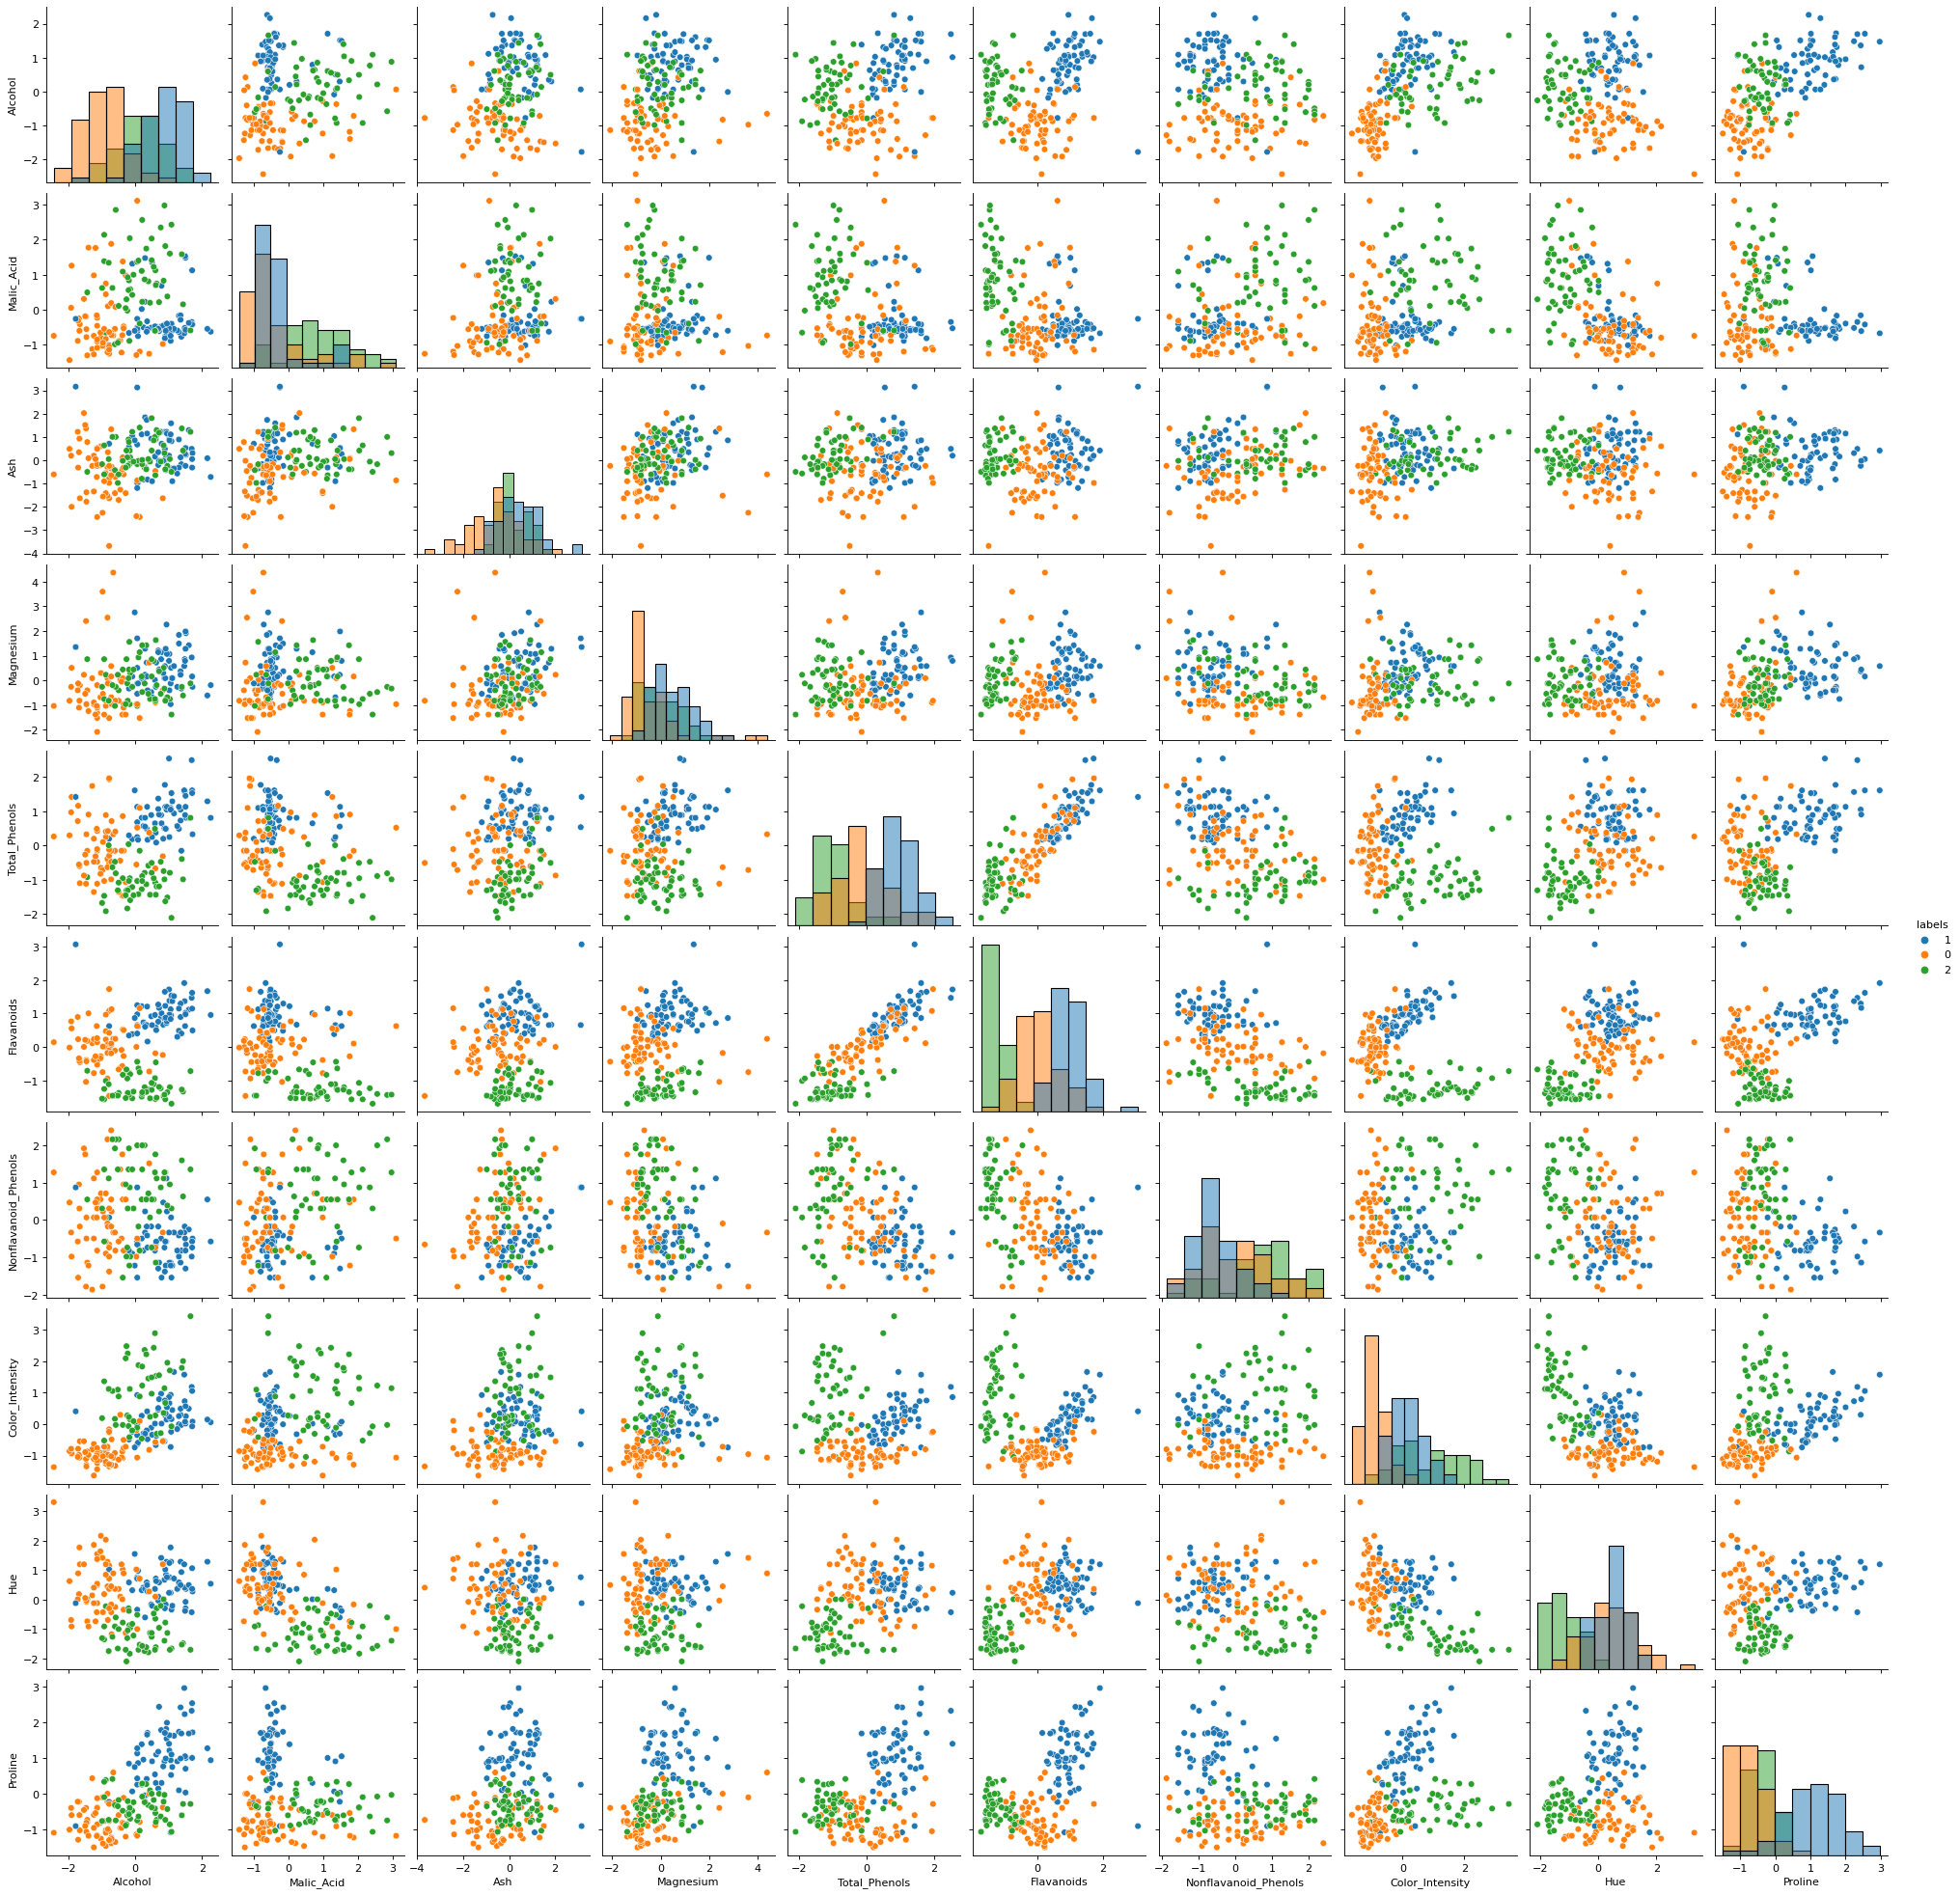

In [ ]:
hcluster_data_reduced['labels'] = labels_h_reduced
hcluster_data_reduced['labels'] = hcluster_data_reduced['labels'].astype('str')

sns.pairplot(hcluster_data_reduced,x_vars = features_reduced,y_vars = features_reduced,
             hue='labels',diag_kind='hist')
plt.show()

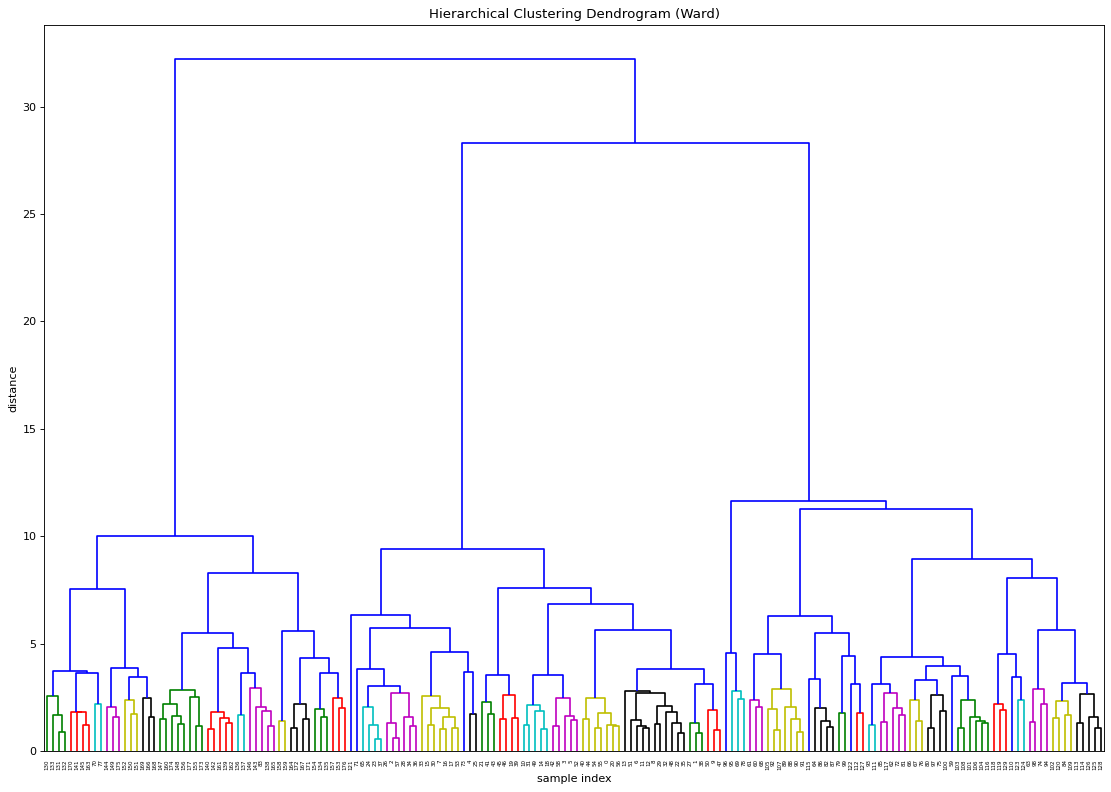

In [ ]:
linkage_matrix = linkage(hcluster_data_reduced, 'ward')
figure = plt.figure(figsize=(14, 10))
dendrogram(linkage_matrix,color_threshold=3)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

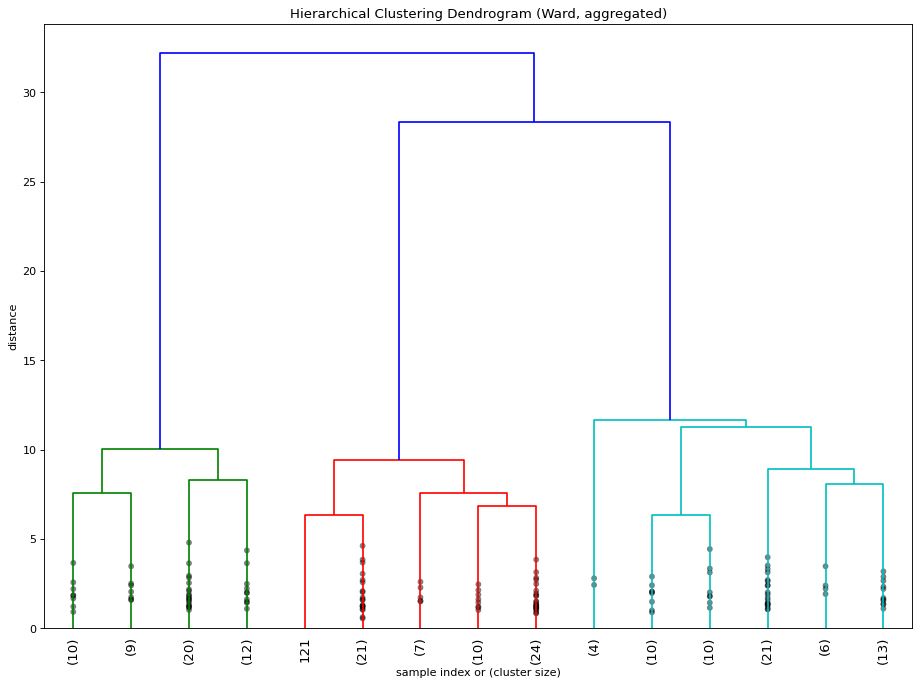

In [ ]:
figure = plt.figure(figsize=(14,10))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,                   # fixing 'p'
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True),  # to get a distribution impression in truncated branches
        
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
hcluster_rd = pd.concat([h_reduced_data[hcluster_data_reduced['labels']=='0'].mean(), 
                  h_reduced_data[hcluster_data_reduced['labels']=='1'].mean(), 
                  h_reduced_data[hcluster_data_reduced['labels']=='2'].mean()],
                  axis=1)
hcluster_rd.columns = ['cluster1','cluster2','cluster3']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
hcluster_rd

cluster1  cluster2  cluster3
Alcohol                 13.037    13.590    12.274
Malic_Acid               3.574     1.950     1.618
Ash                      2.427     2.461     2.198
Ash_Alcanity            21.731    17.737    19.442
Magnesium               97.500   109.194    90.754
Flavanoids               1.034     2.897     1.952
Nonflavanoid_Phenols     0.436     0.287     0.379
Color_Intensity          6.644     5.299     3.272
Hue                      0.713     1.066     1.061

Hierarchical gives overlapping clusters

# 7. DBScan


In [ ]:
cluster_data2 = df.copy()

In [ ]:
scaled_data = scale_function(cluster_data2)
dbscan_data = pd.DataFrame(scaled_data,columns = features)

In [ ]:
dbscan_data.head()

Class_Label   Alcohol  Malic_Acid  ...       Hue     OD280   Proline
0    -1.213944  1.518613   -0.562250  ...  0.362177  1.847920  1.013009
1    -1.213944  0.246290   -0.499413  ...  0.406051  1.113449  0.965242
2    -1.213944  0.196879    0.021231  ...  0.318304  0.788587  1.395148
3    -1.213944  1.691550   -0.346811  ... -0.427544  1.184071  2.334574
4    -1.213944  0.295700    0.227694  ...  0.362177  0.449601 -0.037874

[5 rows x 14 columns]

In [ ]:
dbscan_data.drop(['Ash_Alcanity', 'Proanthocyanins', 'OD280'], axis = 1, inplace=True)

In [ ]:
labels_dbscan,data_dbscan = dbscan_function(dbscan_data,1.9,5)

No. of clusters:  5
Score:  0.18403131840908654


In [ ]:
data_dbscan['labels'] = labels_dbscan

In [ ]:
n_clusters=len(set(labels_dbscan))- (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)
print("Noise points: ", n_noise_,"out of", len(list(labels_dbscan)))

Noise points:  42 out of 178


####Visualise dbscan


In [ ]:
df = data_dbscan.copy()

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(df)

In [ ]:
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="x_component", y="y_component", color = "labels", size_max=60)
fig.update_layout(height=800)
fig.show()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(dbscan_data)
distances, indices = neighbors_fit.kneighbors(dbscan_data)

Text(0, 0.5, 'Epsilon')

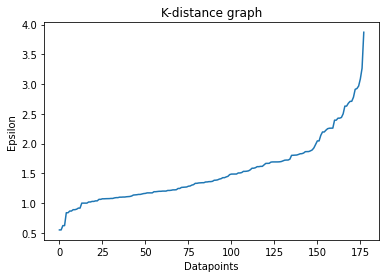

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Datapoints')
plt.ylabel('Epsilon')
